<a href="https://colab.research.google.com/github/Jwalitsolanki/Oil-and-Gas_ML/blob/master/J_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving J-function.csv to J-function.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['J-function.csv']))

In [4]:
df.head()

,Sw %,Sw (fractions),Pc1,Pc2,Pc3,Pc4
0,15,0.15,93.59,28.34,12.82,6.94
1,16,0.16,66.48,20.13,9.10,4.93
2,17,0.17,46.54,14.09,6.37,3.45
3,18,0.18,39.89,12.08,5.46,2.96
4,19,0.19,33.24,10.06,4.55,2.47


In [5]:
# Pc1: capillary pressure of core 1, at 1 md and poro 0.08
# Pc2: capillary pressure of core 2, at 15 md and poro 0.11
# Pc3: capillary pressure of core 3, at 100 md and poro 0.15
# Pc4: capillary pressure of core 4, at 500 md and poro 0.22

In [6]:
sigma = 72 # interfacial tension, in dyne/cm
sigma = sigma * (1/68947.6)  #dyne/cm to psi/cm
theta = 45 #wettability angle

In [7]:
#permeability conversion from md to cm2
k1 = (1 / 1000) * (0.987 * 1E-08)
k2 = (15 / 1000) * (0.987 * 1E-08)
k3 = (100 / 1000) * (0.987 * 1E-08)
k4 = (500 / 1000) * (0.987 * 1E-08)

In [8]:
phi1 = 0.08 
phi2 = 0.11
phi3 = 0.15
phi4 = 0.22

In [9]:
df['J1'] = (df['Pc1'] / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k1 / phi1)
df['J2'] = (df['Pc2'] / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k2 / phi2)
df['J3'] = (df['Pc3'] / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k3 / phi3)
df['J4'] = (df['Pc4'] / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k4 / phi4)

In [10]:
df.head()

,Sw %,Sw (fractions),Pc1,Pc2,Pc3,Pc4,J1,J2,J3,J4
0,15,0.15,93.59,28.34,12.82,6.94,1.407812,1.408022,1.408324,1.407646
1,16,0.16,66.48,20.13,9.10,4.93,1.000014,1.000123,0.999668,0.999956
2,17,0.17,46.54,14.09,6.37,3.45,0.700070,0.700036,0.699768,0.699766
3,18,0.18,39.89,12.08,5.46,2.96,0.600039,0.600173,0.599801,0.600379
4,19,0.19,33.24,10.06,4.55,2.47,0.500007,0.499813,0.499834,0.500992


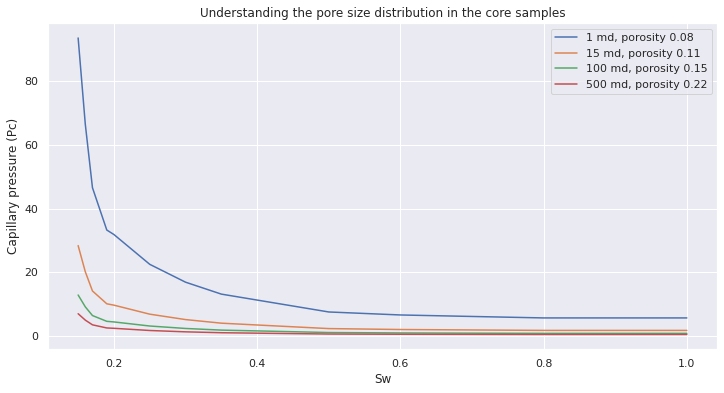

In [16]:
plt.figure(figsize=(12,6))
p1 = plt.plot(df['Sw (fractions)'], df['Pc1'])
p2 = plt.plot(df['Sw (fractions)'], df['Pc2'])
p3 = plt.plot(df['Sw (fractions)'], df['Pc3'])
p4 = plt.plot(df['Sw (fractions)'], df['Pc4'])
plt.xlabel("Sw");
plt.ylabel("Capillary pressure (Pc)")
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('1 md, porosity 0.08', '15 md, porosity 0.11', '100 md, porosity 0.15', '500 md, porosity 0.22'))
plt.title("Understanding the pore size distribution in the core samples")
plt.show()

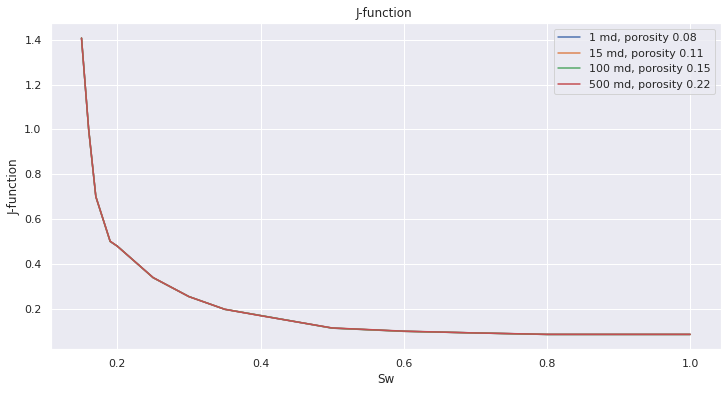

In [17]:
plt.figure(figsize=(12,6))
p1 = plt.plot(df['Sw (fractions)'], df['J1'])
p2 = plt.plot(df['Sw (fractions)'], df['J2'])
p3 = plt.plot(df['Sw (fractions)'], df['J3'])
p4 = plt.plot(df['Sw (fractions)'], df['J4'])
plt.xlabel("Sw");
plt.ylabel("J-function")
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('1 md, porosity 0.08', '15 md, porosity 0.11', '100 md, porosity 0.15', '500 md, porosity 0.22'))
plt.title("J-function ")
plt.show()